In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import (
    classification_report,
    accuracy_score,
    confusion_matrix,
    roc_auc_score,
    roc_curve,
    f1_score,
)

In [3]:
df_1 = pd.read_csv("./5000 YT comments.csv", encoding="cp1252")
df_1 = df_1.copy()
df_1.head()

,Name,Comment,Time,Likes,Reply Count,Spam
0,Taofeekat,&lt;????i make my first million investing in f...,2022-09-28T02:08:55Z,30,30,1
1,Angelina Jordan,&lt;?l will forever be indebted to you I will ...,2022-09-23T05:26:48Z,0,0,1
2,Fernandez Joe,<b>????I recommend a professional forex/Bitcoi...,2022-09-20T12:56:30Z,5,2,1
3,Jessica Billy,I think I’m blessed because if not I wouldn’t ...,2022-09-17T20:20:24Z,21,34,1
4,Allison Zar,<b>I recommend a professional broker to you g...,2022-09-05T09:19:30Z,19,27,1


In [4]:
df_1.rename(columns={"Comment": "CONTENT", "Spam": "CLASS"}, inplace=True)

In [5]:
df_1 = df_1[["CONTENT", "CLASS"]]
df_1.head()

,CONTENT,CLASS
0,&lt;????i make my first million investing in f...,1
1,&lt;?l will forever be indebted to you I will ...,1
2,<b>????I recommend a professional forex/Bitcoi...,1
3,I think I’m blessed because if not I wouldn’t ...,1
4,<b>I recommend a professional broker to you g...,1


In [6]:
df_2 = pd.read_csv("./Youtube-Spam-Dataset.csv")
df_2 = df_2.copy()
df_2 = df_2[["CONTENT", "CLASS"]]
df_2.head()

,CONTENT,CLASS
0,"Huh, anyway check out this you[tube] channel: ...",1
1,Hey guys check out my new channel and our firs...,1
2,just for test I have to say murdev.com,1
3,me shaking my sexy ass on my channel enjoy ^_^ ﻿,1
4,watch?v=vtaRGgvGtWQ Check this out .﻿,1


In [7]:
df = pd.concat([df_1, df_2], ignore_index=True)
df.shape

(6956, 2)

In [8]:
df.drop_duplicates(inplace=True)
df.shape

(6453, 2)

In [9]:
X = df["CONTENT"]
y = df["CLASS"]

In [10]:
from sklearn.pipeline import make_pipeline
from sklearn.ensemble import GradientBoostingRegressor

In [11]:
# def class_model(X, y):
#     X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=13)

#     # Using a pipeline to chain TF-IDF vectorization and Logistic Regression
#     model = make_pipeline(
#         TfidfVectorizer(),
#         LogisticRegression(random_state=13)
#     )

#     model.fit(X_train, y_train)

#     train_predictions = model.predict(X_train)
#     train_accuracy = accuracy_score(y_train, train_predictions)

#     test_predictions = model.predict(X_test)
#     test_accuracy = accuracy_score(y_test, test_predictions)

#     # Get probabilities for ROC-AUC (for the positive class, class 1)
#     test_probabilities = model.predict_proba(X_test)[:, 1]

#     # Calculate ROC-AUC score
#     roc_auc = roc_auc_score(y_test, test_probabilities)
#     print(f"ROC-AUC Score: {roc_auc:.4f}")

#     # Calculate and print F1 score
#     f1 = f1_score(y_test, test_predictions)
#     print("F1 Score:", f1)

#     cm = confusion_matrix(y_test, test_predictions)

#     # Plotting confusion matrix
#     plt.figure(figsize=(6, 4))
#     sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
#     plt.title('Log Reg Confusion Matrix')
#     plt.ylabel('Actual')
#     plt.xlabel('Predicted')
#     plt.show()

#     # Compute ROC curve and plot it
#     fpr, tpr, _ = roc_curve(y_test, test_probabilities)

#     plt.figure(figsize=(8, 6))
#     plt.plot(fpr, tpr, color='blue', label=f'ROC curve (area = {roc_auc:.2f})')
#     plt.plot([0, 1], [0, 1], color='gray', linestyle='--')  # Diagonal line for random guessing
#     plt.xlabel('False Positive Rate')
#     plt.ylabel('True Positive Rate')
#     plt.title('Receiver Operating Characteristic (ROC) Curve')
#     plt.legend(loc='lower right')
#     plt.show()

#     print(f"Train Accuracy: {train_accuracy:.4f}")
#     print(f"Test Accuracy: {test_accuracy:.4f}")

In [12]:
# class_model(X,y)

ROC-AUC Score: 0.9584
F1 Score: 0.8941176470588236
Train Accuracy: 0.9318
Test Accuracy: 0.9024


In [13]:
from sklearn.naive_bayes import BernoulliNB

In [14]:
# def bernoulli(X, y):

#     vect = TfidfVectorizer(binary=True)
#     X = vect.fit_transform(X)

#     X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=13)

#     ber = BernoulliNB()

#     ber.fit(X_train, y_train)
#     predictions = ber.predict(X_test)

#     print("Train Score:", ber.score(X_train, y_train))
#     print("Test Score:", ber.score(X_test, y_test))

#     # Calculate and print F1 score
#     f1 = f1_score(y_test, predictions)
#     print("F1 Score:", f1)

#     probabilities = ber.predict_proba(X_test)[:, 1]  # Probabilities for the positive class (class 1)

#     cm = confusion_matrix(y_test, predictions)

#     # Plotting confusion matrix
#     plt.figure(figsize=(6, 4))
#     sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
#     plt.title('Naive Bayes Confusion Matrix')
#     plt.ylabel('Actual')
#     plt.xlabel('Predicted')
#     plt.show()

#     roc_auc = roc_auc_score(y_test, probabilities)
#     print("ROC-AUC score:", roc_auc)

#     # Compute ROC curve and plot it
#     fpr, tpr, _ = roc_curve(y_test, probabilities)

#     plt.figure(figsize=(8, 6))
#     plt.plot(fpr, tpr, color='blue', label=f'ROC curve (area = {roc_auc:.2f})')
#     plt.plot([0, 1], [0, 1], color='gray', linestyle='--')  # Diagonal line for random guessing
#     plt.xlabel('False Positive Rate')
#     plt.ylabel('True Positive Rate')
#     plt.title('Receiver Operating Characteristic (ROC) Curve')
#     plt.legend(loc='lower right')
#     plt.show()


Train Score: 0.8120883378535452
Test Score: 0.7831138652207591
F1 Score: 0.7276264591439688


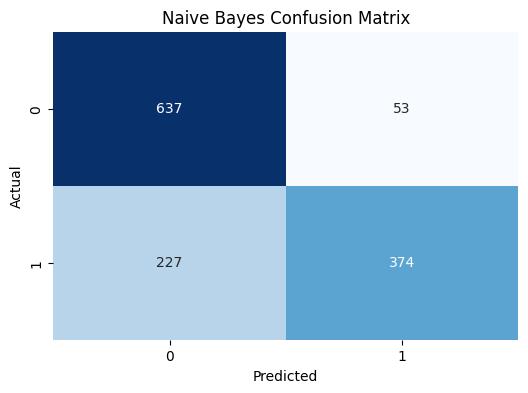

ROC-AUC score: 0.9056295063782585


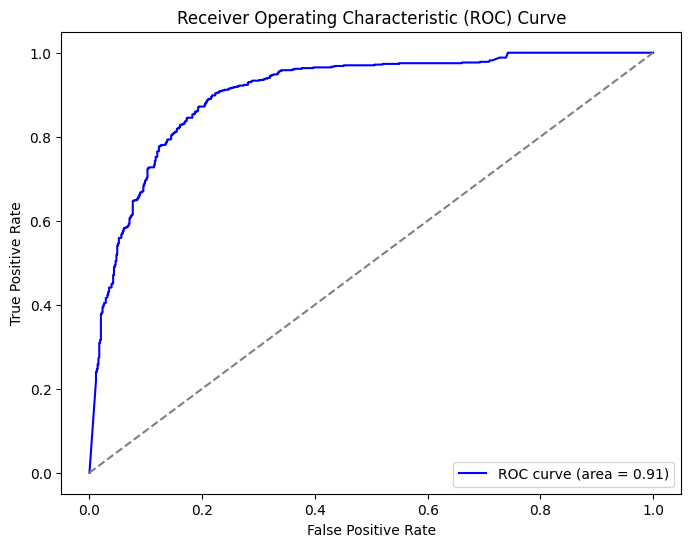

In [15]:
# bernoulli(X,y)

In [16]:
import xgboost as xgb

In [30]:
# def xgb_model_prod(X, y):
#     X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=13)

#     # Using a pipeline to chain TF-IDF vectorization and XGBoost Classifier
#     model = make_pipeline(
#         TfidfVectorizer(),
#         xgb.XGBClassifier(
#             objective='binary:logistic',
#             max_depth=9,
#             learning_rate=0.1,
#             eval_metric='logloss'
#         )
#     )

#     model.fit(X_train, y_train)

#     train_predictions = model.predict(X_train)
#     train_accuracy = accuracy_score(y_train, train_predictions)

#     test_predictions = model.predict(X_test)
#     test_accuracy = accuracy_score(y_test, test_predictions)

#     # Get predicted probabilities for ROC-AUC
#     probabilities = model.predict_proba(X_test)

#     # Set custom threshold for classifying the predictions
#     threshold = 0.65
#     custom_predictions = (probabilities[:, 1] >= threshold).astype(int)

#     # Calculate F1 score
#     f1 = f1_score(y_test, custom_predictions)
#     print(f"F1 Score (using threshold {threshold}): {f1:.4f}")

#     # Calculate ROC-AUC score
#     roc_auc = roc_auc_score(y_test, probabilities[:, 1])
#     print(f"ROC-AUC Score: {roc_auc:.4f}")

#     # # Plot ROC curve
#     # fpr, tpr, _ = roc_curve(y_test, probabilities[:, 1])
#     # plt.figure(figsize=(8, 6))
#     # plt.plot(fpr, tpr, color='blue', label=f'ROC curve (area = {roc_auc:.2f})')
#     # plt.plot([0, 1], [0, 1], color='gray', linestyle='--')  # Diagonal line for random guessing
#     # plt.xlabel('False Positive Rate')
#     # plt.ylabel('True Positive Rate')
#     # plt.title('Receiver Operating Characteristic (ROC) Curve')
#     # plt.legend(loc='lower right')
#     # plt.show()

#     # # Confusion matrix
#     # cm = confusion_matrix(y_test, custom_predictions)
#     # plt.figure(figsize=(6, 4))
#     # sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
#     # plt.title(f'XGBoost Confusion Matrix (Threshold = {threshold})')
#     # plt.ylabel('Actual')
#     # plt.xlabel('Predicted')
#     # plt.show()

#     print(f"Train Accuracy: {train_accuracy:.4f}")
#     print(f"Test Accuracy (using threshold {threshold}): {test_accuracy:.4f}")

#     return model

In [31]:
# model = xgb_model_prod(X, y)

F1 Score (using threshold 0.65): 0.8656
ROC-AUC Score: 0.9570
Train Accuracy: 0.9502
Test Accuracy (using threshold 0.65): 0.9047


In [22]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.pipeline import make_pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import accuracy_score, classification_report
import xgboost as xgb

In [23]:
# def xgb_model_prod_grid_search(X, y):
#     X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=13)

#     # Creating a pipeline with TF-IDF vectorization and XGBoost Classifier
#     model = make_pipeline(
#         TfidfVectorizer(),
#         xgb.XGBClassifier(objective='binary:logistic', eval_metric='logloss')
#     )

#     # Defining the hyperparameter grid
#     param_grid = {
#         'xgbclassifier__max_depth': [3, 6, 9],
#         'xgbclassifier__learning_rate': [0.01, 0.1, 0.2],
#         'xgbclassifier__n_estimators': [50, 100, 150]
#     }

#     # Setting up GridSearchCV
#     grid_search = GridSearchCV(model, param_grid, cv=5, scoring='accuracy', verbose=1)

#     # Fitting the model with Grid Search
#     grid_search.fit(X_train, y_train)

#     print(f"Best Hyperparameters: {grid_search.best_params_}")

#     # Best model after grid search
#     best_model = grid_search.best_estimator_

#     train_predictions = best_model.predict(X_train)
#     train_accuracy = accuracy_score(y_train, train_predictions)

#     test_predictions = best_model.predict(X_test)
#     test_accuracy = accuracy_score(y_test, test_predictions)

#     # Printing the predicted probabilities and corresponding raw text from X_test
#     probabilities = best_model.predict_proba(X_test)

#     threshold = 0.5
#     custom_predictions = (probabilities[:, 1] >= threshold).astype(int)

#     print("\nPredicted Probabilities for each test sample:")
#     for i, (prob_0, prob_1) in enumerate(probabilities):
#         print(f"Sample {i + 1}: Class 0 Probability: {prob_0:.4f}, Class 1 Probability: {prob_1:.4f}")
#         print(f"Comment: {X_test.iloc[i]}\n")

#     print(f"Train Accuracy: {train_accuracy:.4f}")
#     print(f"Test Accuracy (using threshold {threshold}): {test_accuracy:.4f}")
#     print("Classification report:\n", classification_report(y_test, custom_predictions))

#     return best_model


In [24]:
# xgb_model_prod_grid_search(X,y)

Best Hyperparameters: {'xgbclassifier__learning_rate': 0.2, 'xgbclassifier__max_depth': 6, 'xgbclassifier__n_estimators': 150}


In [32]:
def xgb_model_prod_best_params(X, y):
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=13
    )

    # Pipeline for TF-IDF vectorization and XGBoost Classifier
    model = make_pipeline(
        TfidfVectorizer(),
        xgb.XGBClassifier(
            objective="binary:logistic",
            max_depth=6,
            learning_rate=0.2,
            eval_metric="logloss",
            n_estimators=150,
        ),
    )

    model.fit(X_train, y_train)

    # Get predicted probabilities instead of direct predictions
    probabilities = model.predict_proba(X_test)

    # Set custom threshold for classifying the predictions
    threshold = 0.55
    custom_predictions = (probabilities[:, 1] >= threshold).astype(int)

    # Confusion matrix
    cm = confusion_matrix(y_test, custom_predictions)

    # plt.figure(figsize=(6, 4))
    # sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
    # plt.title(f'XGBoost Confusion Matrix (Threshold = {threshold})')
    # plt.ylabel('Actual')
    # plt.xlabel('Predicted')
    # plt.show()

    # Calculate F1 score
    f1 = f1_score(y_test, custom_predictions)
    print(f"F1 Score: {f1:.4f}")

    # Calculate ROC-AUC score
    roc_auc = roc_auc_score(y_test, probabilities[:, 1])
    print(f"ROC-AUC Score: {roc_auc:.4f}")

    # Plot ROC curve
    # fpr, tpr, _ = roc_curve(y_test, probabilities[:, 1])
    # plt.figure(figsize=(8, 6))
    # plt.plot(fpr, tpr, color='blue', label=f'ROC curve (area = {roc_auc:.2f})')
    # plt.plot([0, 1], [0, 1], color='gray', linestyle='--')  # Diagonal line for random guessing
    # plt.xlabel('False Positive Rate')
    # plt.ylabel('True Positive Rate')
    # plt.title('Receiver Operating Characteristic (ROC) Curve')
    # plt.legend(loc='lower right')
    # plt.show()

    # Accuracy scores
    print(f"Train Accuracy: {accuracy_score(y_train, model.predict(X_train)):.4f}")
    print(f"Test Accuracy: {accuracy_score(y_test, custom_predictions):.4f}")

    return model

In [33]:
print("XGBOOSTED Best params")
model = xgb_model_prod_best_params(X, y)

XGBOOSTED Best params
F1 Score: 0.8877
ROC-AUC Score: 0.9615
Train Accuracy: 0.9607
Test Accuracy: 0.8993


Pipeline(steps=[('tfidfvectorizer', TfidfVectorizer()),
                ('xgbclassifier',
                 XGBClassifier(base_score=None, booster=None, callbacks=None,
                               colsample_bylevel=None, colsample_bynode=None,
                               colsample_bytree=None, device=None,
                               early_stopping_rounds=None,
                               enable_categorical=False, eval_metric='logloss',
                               feature_types=None, gamma=None, grow_policy=None,
                               importance_type=None,
                               interaction_constraints=None, learning_rate=0.2,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=6, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, multi_strategy=None,
                               n_estimators=150, n_jobs=None,
                               num_parallel_tree=None, random_state=None, ...))])

LOG REG
- F1 Score: 0.8941176470588236
- ROC-AUC Score: 0.9584
- Train Accuracy: 0.9318
- Test Accuracy: 0.9024

XGBOOST Best params
- F1 Score: 0.8877
- ROC-AUC Score: 0.9615
- Train Accuracy: 0.9607
- Test Accuracy: 0.8993


XGBoost basic
- F1 Score (using threshold 0.65): 0.8656
- ROC-AUC Score: 0.9570
- Train Accuracy: 0.9502
- Test Accuracy (using threshold 0.65): 0.9047


In [19]:
# Predict class of a given comment
def predict_spam_comment(model, new_comment):
    probabilities = model.predict_proba([new_comment])

    predicted_class = model.predict([new_comment])[0]

    # Get the probability of the predicted class
    predicted_probability = probabilities[0][predicted_class]

    if predicted_class == 1:
        return f"Spam (Probability: {predicted_probability:.4f})"
    else:
        return f"Not Spam (Probability: {predicted_probability:.4f})"

In [20]:
# Test comment
spam = "Check out this link for free gifts: http://spamlink.com"
not_spam = "AMAZINGGG, @yunan check this!"

In [ ]:
# Call the prediction function
result = predict_spam_comment(model, not_spam)
print(result)